In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/data.csv", index_col ="day")

In [3]:
df.describe()

,gsid,index_no,year,month,max_temp,min_temp
count,4017.0,4017.0,4017.000000,4017.000000,4017.000000,4017.000000
mean,366.0,1030.0,2014.000000,6.523774,26.286308,13.005253
std,0.0,0.0,3.162199,3.448901,4.454506,6.372100
min,366.0,1030.0,2009.000000,1.000000,10.000000,-2.000000
25%,366.0,1030.0,2011.000000,4.000000,23.000000,7.400000
50%,366.0,1030.0,2014.000000,7.000000,27.400000,13.500000
75%,366.0,1030.0,2017.000000,10.000000,30.000000,19.400000
max,366.0,1030.0,2019.000000,12.000000,35.200000,22.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 1 to 31
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gsid      4017 non-null   int64  
 1   index_no  4017 non-null   int64  
 2   station   4017 non-null   object 
 3   district  4017 non-null   object 
 4   year      4017 non-null   int64  
 5   month     4017 non-null   int64  
 6   max_temp  4017 non-null   float64
 7   min_temp  4017 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 282.4+ KB


In [5]:
import matplotlib.pyplot as plt

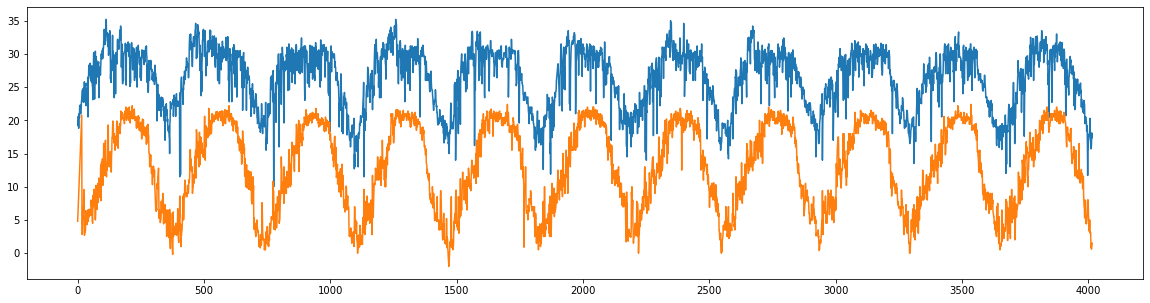

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df["max_temp"].to_numpy())
plt.plot(df["min_temp"].to_numpy())

In [7]:
max_temp = df["max_temp"].to_numpy()
min_temp = df["min_temp"].to_numpy()

In [8]:
diff = max_temp - min_temp

In [9]:
df["diff_temp"] = diff

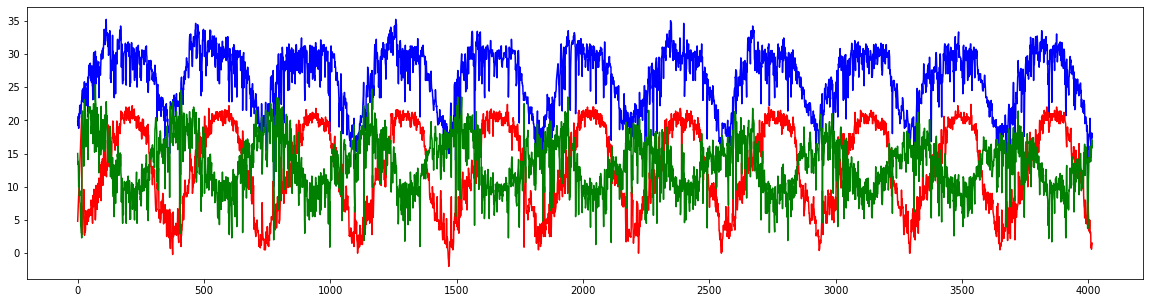

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df["max_temp"].to_numpy(), "b")
plt.plot(df["min_temp"].to_numpy(), "r")
plt.plot(diff, "g")

In [11]:
max_1 = np.zeros(df.shape[0])
max_2 = np.zeros(df.shape[0])
max_3 = np.zeros(df.shape[0])
max_4 = np.zeros(df.shape[0])
max_5 = np.zeros(df.shape[0])
max_6 = np.zeros(df.shape[0])

min_1 = np.zeros(df.shape[0])
min_2 = np.zeros(df.shape[0])
min_3 = np.zeros(df.shape[0])
min_4 = np.zeros(df.shape[0])
min_5 = np.zeros(df.shape[0])
min_6 = np.zeros(df.shape[0])

diff_1 = np.zeros(df.shape[0])
diff_2 = np.zeros(df.shape[0])
diff_3 = np.zeros(df.shape[0])
diff_4 = np.zeros(df.shape[0])
diff_5 = np.zeros(df.shape[0])
diff_6 = np.zeros(df.shape[0])

In [12]:
max_list = [max_1, max_2, max_3, max_4, max_5, max_6]
min_list = [min_1, min_2, min_3, min_4, min_5, min_6]
diff_list = [diff_1, diff_2, diff_3, diff_4,diff_5, diff_6]

In [13]:
max_temp = df["max_temp"].to_numpy()
min_temp = df["min_temp"].to_numpy()
diff_temp = df["diff_temp"].to_numpy()


In [14]:
max_dict = {"max_1": max_1, "max_2": max_2, "max_3":max_3,
           "max_4": max_4, "max_5": max_5}
min_dict = {"min_1": min_1, "min_2": min_2, "min_3":min_3,
           "min_4": min_4, "min_5": min_5}
diff_dict = {"diff_1": diff_1, "diff_2": diff_2, "diff_3":diff_3,
           "diff_4": diff_4, "diff_5": diff_5}

In [15]:
def create_array(parameter,temp, day=0):
    col = df.shape[0]
    for i in range(col):
        prev_index = i-1
        if prev_index< 0 :
            temp[day][i] = None
        else:
            temp[day][i] =  parameter[prev_index]
    day = day+1
    if day <len(temp):
        create_array(temp[day-1],temp=temp, day=day)
def addColumns(temp):
    for temp in temp:
        for key, value in zip(list(temp.keys()), list(temp.values())):
            df[key]= value

In [16]:
create_array(max_temp, max_list)
create_array(min_temp, min_list)
create_array(diff_temp, diff_list)


In [17]:
temp_list = [max_dict, min_dict, diff_dict]
addColumns(temp_list)

In [18]:
for i in range(1,6):
    df =df.drop(i)

In [19]:
df = df.drop(["station", "district","gsid", "index_no"], axis=1)

In [20]:
df.to_csv("Datasets/Processed.csv")